In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load our data in 
housing = pd.read_csv("housing.csv")

### Exploratory Data Analysis

Now that we have loaded our data we can now take a look at our data to see if we can find any N/A values and also look for any outliers that might be in our data. 

In [5]:
# let's look at our data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# let's get a simple stats summary of our data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


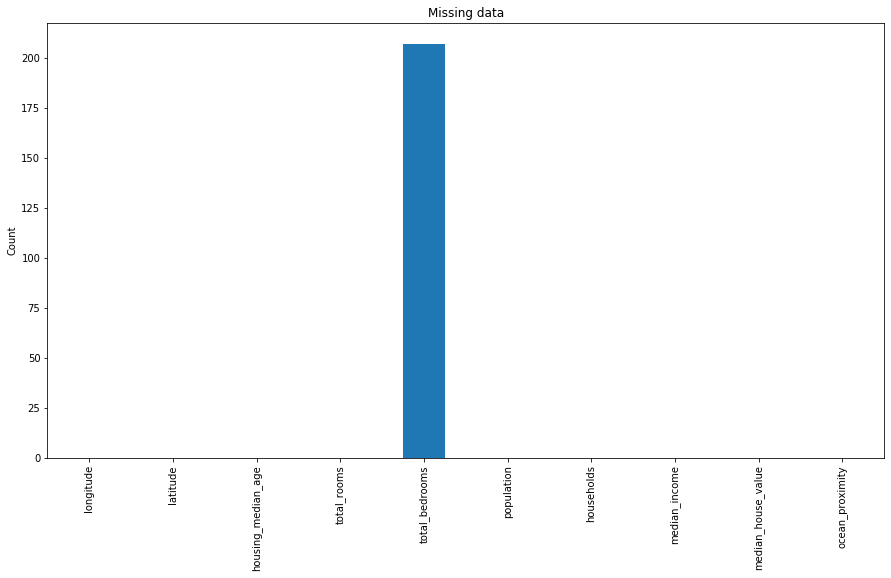

In [8]:
# finding missing values
plt.figure(figsize=(15,8))
plt.title('Missing data')
plt.ylabel("Count")

housing.isnull().sum().plot(kind = 'bar')


In [10]:
# looks like we are missing some bedroom data, we will replace the missing data with the median total bedrooms because we have some
# outliers that would make the mean inaccurate and we don't want to drop the outliers.
median = housing["total_bedrooms"].median()
housing['total_bedrooms'].fillna(median, inplace=True)
print(housing.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DF8C3F860>,
      dtype=object)

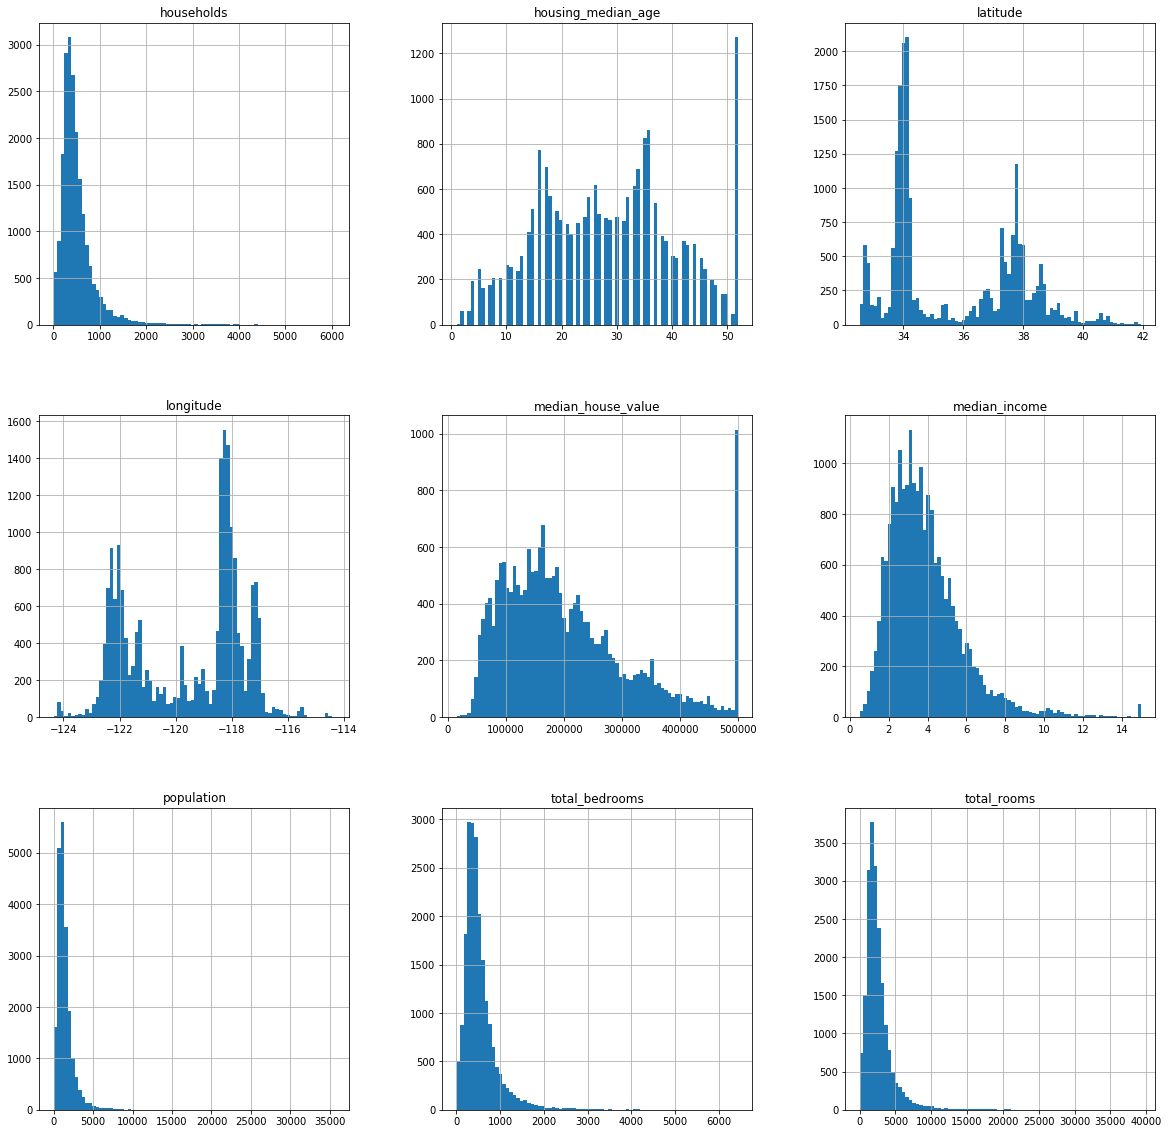

In [12]:
# much better, now let's make some histograms of our data
housing.hist(bins=80, figsize=(20,20))

#### We can see in the histograms above that our data tends to be skewed to the right. This will be something we will consider when we model are data later on. Next we will take a look at house value in comparison to there proximity to water whether it be the ocean or bay.  

Text(0.5, 1.0, 'House value on Ocean Proximity Categories')

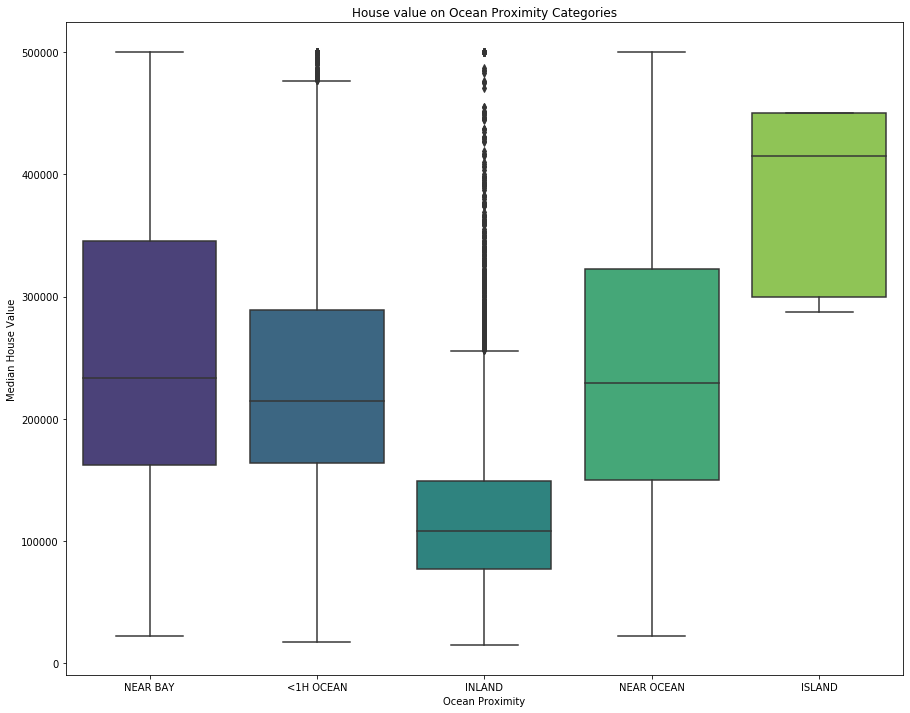

In [13]:
plt.figure(figsize=(15,12))
sns.boxplot(data=housing, x="ocean_proximity", y="median_house_value", palette="viridis")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.title("House value on Ocean Proximity Categories")